In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout, concatenate, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
import requests
import tensorflow as tf


In [ ]:
# Load and preprocess the data
data = pd.read_csv('/content/drive/MyDrive/Truth seek/Features_For_Traditional_ML_Techniques.csv')
data = data.drop(columns=['Unnamed: 0', 'majority_target', 'statement', 'embeddings'])

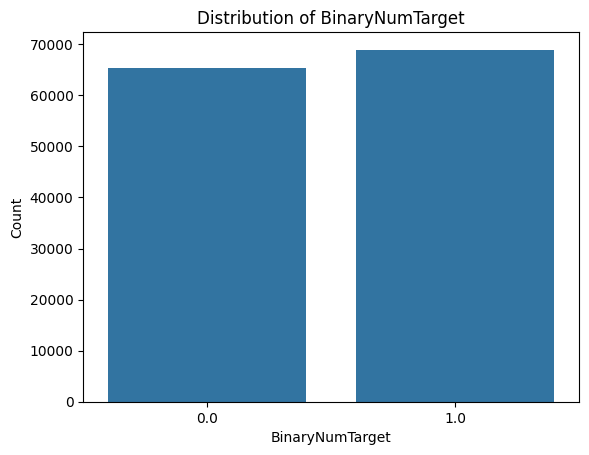

In [ ]:
# Plot target variable distribution
sns.countplot(x='BinaryNumTarget', data=data)
plt.xlabel('BinaryNumTarget')
plt.ylabel('Count')
plt.title('Distribution of BinaryNumTarget')
plt.show()

In [ ]:
# Prepare tweet data for model
max_words = 1000  # Max number of words to keep in Tokenizer
max_seq_length = 100  # Max sequence length for padding


In [ ]:
import re

def clean_text(text):
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)  # Remove multiple spaces
    text = text.lower().strip()  # Convert to lowercase and strip leading/trailing spaces
    return text

data['tweet'] = data['tweet'].apply(clean_text)


In [ ]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data['tweet'])
sequences = tokenizer.texts_to_sequences(data['tweet'])
word_index = tokenizer.word_index

tweet_data = pad_sequences(sequences, maxlen=max_seq_length)

In [ ]:
# Target variable
target = data['BinaryNumTarget'].values

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(tweet_data, target, test_size=0.2, random_state=42)

In [ ]:
# RNN Model Architecture
text_input = Input(shape=(max_seq_length,))
embedding_layer = Embedding(max_words, 100)(text_input)
lstm_layer = LSTM(64, return_sequences=False)(embedding_layer)
lstm_layer = Dropout(0.5)(lstm_layer)
dense_layer = Dense(64, activation='relu')(lstm_layer)
dense_layer = Dropout(0.5)(dense_layer)
output_layer = Dense(1, activation='sigmoid')(lstm_layer)

In [ ]:
optimizer = tf.keras.optimizers.AdamW(learning_rate=0.00001)

In [ ]:
model = Model(inputs=text_input, outputs=output_layer)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Model Training
callbacks = [EarlyStopping(patience=3, monitor='val_loss', restore_best_weights=True)]
history = model.fit(X_train, y_train, epochs=50, batch_size=32,
                    validation_split=0.2, callbacks=callbacks)


Epoch 1/50
2684/2684 ━━━━━━━━━━━━━━━━━━━━ 217s 80ms/step - accuracy: 0.5360 - loss: 0.6906 - val_accuracy: 0.6359 - val_loss: 0.6705
Epoch 2/50
2684/2684 ━━━━━━━━━━━━━━━━━━━━ 206s 77ms/step - accuracy: 0.6792 - loss: 0.6367 - val_accuracy: 0.7698 - val_loss: 0.4926
Epoch 3/50
2684/2684 ━━━━━━━━━━━━━━━━━━━━ 205s 76ms/step - accuracy: 0.8290 - loss: 0.4649 - val_accuracy: 0.8528 - val_loss: 0.3971
Epoch 4/50
2684/2684 ━━━━━━━━━━━━━━━━━━━━ 261s 76ms/step - accuracy: 0.8700 - loss: 0.3777 - val_accuracy: 0.8825 - val_loss: 0.3333
Epoch 5/50
2684/2684 ━━━━━━━━━━━━━━━━━━━━ 261s 76ms/step - accuracy: 0.8896 - loss: 0.3217 - val_accuracy: 0.8939 - val_loss: 0.2950
Epoch 6/50
2684/2684 ━━━━━━━━━━━━━━━━━━━━ 264s 77ms/step - accuracy: 0.9001 - loss: 0.2859 - val_accuracy: 0.9006 - val_loss: 0.2676
Epoch 7/50
2684/2684 ━━━━━━━━━━━━━━━━━━━━ 274s 81ms/step - accuracy: 0.9095 - loss: 0.2583 - val_accuracy: 0.9068 - val_loss: 0.2488
Epoch 8/50
2684/2684 ━━━━━━━━━━━━━━━━━━━━ 251s 77ms/step - accuracy: 

In [ ]:
# Print validation accuracy for each epoch
val_accuracy = history.history['val_accuracy']
print("Validation Accuracy for each epoch:")
for epoch, accuracy in enumerate(val_accuracy, 1):
    print(f"Epoch {epoch}: {accuracy:.4f}")

# Print final validation accuracy
final_val_accuracy = val_accuracy[-1]
print(f'Final Validation Accuracy: {final_val_accuracy:.4f}')

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

Validation Accuracy for each epoch:
Epoch 1: 0.6359
Epoch 2: 0.7698
Epoch 3: 0.8528
Epoch 4: 0.8825
Epoch 5: 0.8939
Epoch 6: 0.9006
Epoch 7: 0.9068
Epoch 8: 0.9110
Epoch 9: 0.9135
Epoch 10: 0.9168
Epoch 11: 0.9177
Epoch 12: 0.9196
Epoch 13: 0.9202
Epoch 14: 0.9214
Epoch 15: 0.9223
Epoch 16: 0.9226
Epoch 17: 0.9236
Epoch 18: 0.9242
Epoch 19: 0.9246
Epoch 20: 0.9246
Epoch 21: 0.9256
Epoch 22: 0.9264
Epoch 23: 0.9266
Epoch 24: 0.9260
Epoch 25: 0.9263
Epoch 26: 0.9270
Epoch 27: 0.9277
Epoch 28: 0.9283
Epoch 29: 0.9278
Epoch 30: 0.9283
Epoch 31: 0.9287
Epoch 32: 0.9277
Epoch 33: 0.9287
Epoch 34: 0.9293
Epoch 35: 0.9270
Epoch 36: 0.9272
Epoch 37: 0.9292
Epoch 38: 0.9293
Epoch 39: 0.9291
Epoch 40: 0.9297
Epoch 41: 0.9282
Epoch 42: 0.9293
Epoch 43: 0.9293
Epoch 44: 0.9295
Epoch 45: 0.9292
Epoch 46: 0.9294
Epoch 47: 0.9302
Epoch 48: 0.9304
Epoch 49: 0.9299
Epoch 50: 0.9305
Final Validation Accuracy: 0.9305
839/839 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 0.9356 - loss: 0.1751
Test Accurac

In [ ]:
# Define the function to get relevant news URLs
def get_relevant_urls(tweet_text):
    api_key = '06cba0dcd3d84dc3bc34aac90e62ba89'  # Replace with your actual NewsAPI.org API key
    url = f'https://newsapi.org/v2/everything?q={tweet_text}&sortBy=relevancy&apiKey={api_key}'

    response = requests.get(url)
    response_data = response.json()

    try:
        articles = response_data['articles']
    except KeyError:
        print("Error: The 'articles' key was not found in the API response.")
        return []

    urls = [article.get('url', '') for article in articles]
    return urls

In [ ]:
# Example for new texts
new_texts = [
  "Sri Lanka faces a crucial challenge as they head into the second Test against England on Thursday at Lord’s, a venue that has often served as an unlikely home away from home for the visiting side."
 ]

In [ ]:
# Preprocess the new texts
new_sequences = tokenizer.texts_to_sequences(new_texts)
new_data = pad_sequences(new_sequences, maxlen=max_seq_length)

In [ ]:
# Get predictions and news URLs
new_predictions = model.predict(new_data)
predicted_classes = (new_predictions > 0.5).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


In [ ]:
for text, prediction in zip(new_texts, predicted_classes):
    print(f"Tweet: {text}")
    print(f"Prediction: {'Positive' if prediction == 1 else 'Negative'}")
    urls = get_relevant_urls(text)
    print(f"Relevant News URLs: {urls}")
    print()

Tweet: Sri Lanka faces a crucial challenge as they head into the second Test against England on Thursday at Lord’s, a venue that has often served as an unlikely home away from home for the visiting side.
Prediction: Negative
Relevant News URLs: []



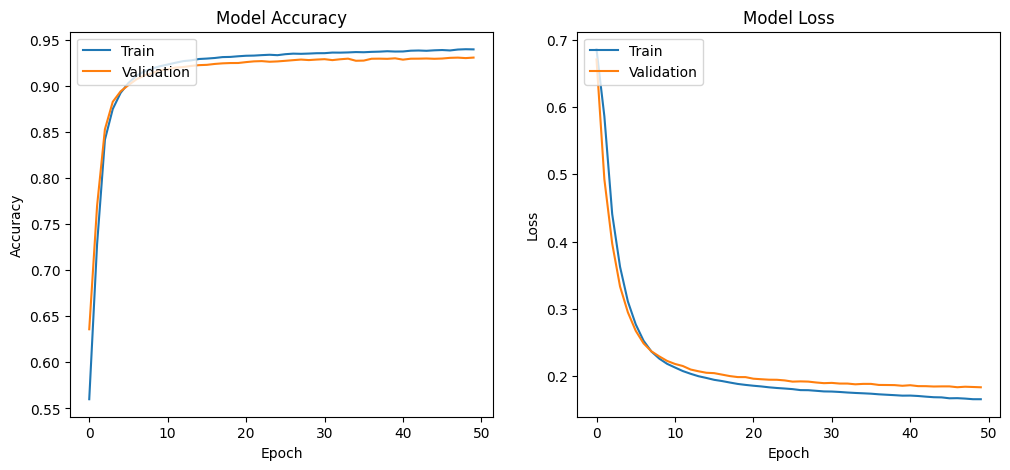

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

839/839 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step


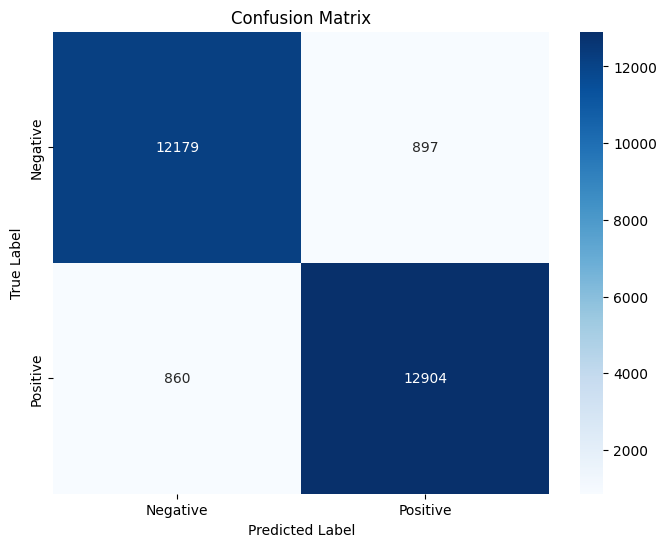

              precision    recall  f1-score   support

    Negative       0.93      0.93      0.93     13076
    Positive       0.94      0.94      0.94     13764

    accuracy                           0.93     26840
   macro avg       0.93      0.93      0.93     26840
weighted avg       0.93      0.93      0.93     26840



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Make predictions on the test set
y_pred_prob = model.predict(X_test)

# Step 2: Convert probabilities to binary labels
y_pred = (y_pred_prob > 0.5).astype(int)

# Step 3: Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Step 4: Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Optional: Print a classification report for detailed metrics
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))


In [ ]:
model.save('verity_function3.h5')


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model2 = load_model('/content/verity_function3.h5')


In [ ]:
# Load dataset from a local CSV file
custom_data = pd.read_csv('/content/drive/MyDrive/Truth seek/Function3_data.csv')

# Display the first few rows to check if it's loaded correctly
custom_data.head()

,heading,content,label,Word count,Max word length,Min word length,Average word length,present_verbs,past_verbs,adjectives,...,PERSON,ORDINAL,TIME,NORP,FAC,WORK_OF_ART,MONEY,PERCENT,LAW,LANGUAGE
0,New largest dinosaur species found in Australi...,Scientists in Australia lack declassify a old ...,1,379.0,16.0,1.0,5.242744,47.0,0.0,40.0,...,5.405405,2.702703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SAITM issue: President to discuss with stakeho...,President Maithripala Sirisena disinherit summ...,1,117.0,20.0,1.0,5.683761,22.0,0.0,6.0,...,25.000000,NaN,12.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Intern’l responsibilities crucial for developm...,Norwegian Prime Minister Erna Solberg said tod...,1,251.0,16.0,1.0,5.840637,38.0,0.0,27.0,...,25.000000,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN
3,Five remanded over assault on Sri Lankan HC,"Five people , who differ arrested for allegedl...",1,126.0,14.0,1.0,5.214286,17.0,0.0,6.0,...,17.391304,NaN,4.347826,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Banners with LTTE chief's pic land duo in jail,Two nonmember of a fringe Tamil nationalist pa...,1,169.0,12.0,1.0,5.313609,23.0,0.0,11.0,...,25.000000,3.571429,NaN,3.571429,3.571429,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Clean and preprocess the data
def clean_text(text):
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)  # Remove multiple spaces
    text = text.lower().strip()  # Convert to lowercase and strip leading/trailing spaces
    return text

custom_data['content'] = custom_data['content'].apply(clean_text)


In [ ]:
# Tokenizer and padding
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(custom_data['content'])
sequences = tokenizer.texts_to_sequences(custom_data['content'])
tweet_data = pad_sequences(sequences, maxlen=max_seq_length)

# Target variable
target = custom_data['label'].values

In [ ]:
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(tweet_data, target, test_size=0.2, random_state=42)


In [ ]:
from tensorflow.keras.models import load_model

# Load the pre-trained model
model = load_model('verity_function3.h5')


In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Compile the model (ensure it uses the same configuration as before)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])  # Change to a less suitable loss function

# Train the model with custom data
callbacks = [EarlyStopping(patience=3, monitor='val_loss', restore_best_weights=True)]
history = model.fit(X_train, y_train, epochs=10, batch_size=64,
                    validation_split=0.2, callbacks=callbacks)


Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 154ms/step - accuracy: 0.9932 - loss: 0.0064 - val_accuracy: 0.9954 - val_loss: 0.0041
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 127ms/step - accuracy: 0.9969 - loss: 0.0031 - val_accuracy: 0.9954 - val_loss: 0.0041
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 261ms/step - accuracy: 0.9921 - loss: 0.0073 - val_accuracy: 0.9954 - val_loss: 0.0041
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 207ms/step - accuracy: 0.9945 - loss: 0.0045 - val_accuracy: 0.9954 - val_loss: 0.0041
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step - accuracy: 0.9957 - loss: 0.0036 - val_accuracy: 0.9954 - val_loss: 0.0041


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9922 - loss: 0.0249
Test Accuracy: 98.90%


In [ ]:
# Make predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


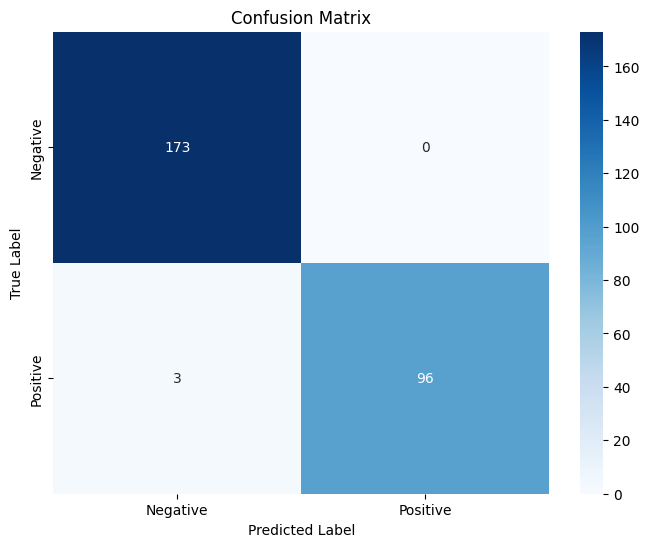

              precision    recall  f1-score   support

    Negative       0.98      1.00      0.99       173
    Positive       1.00      0.97      0.98        99

    accuracy                           0.99       272
   macro avg       0.99      0.98      0.99       272
weighted avg       0.99      0.99      0.99       272



In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Print a classification report
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))


In [ ]:
# Save the retrained model
model.save('verity_function3_retrained.h5')